<a href="https://colab.research.google.com/github/simsekergun/RandomlyRotated/blob/main/Classification_RandomlyRotatedScatterer_NeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import AdamW

import keras_tuner as kt

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
url1 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM1.csv'
df1 = pd.read_csv(url1, index_col=0)

url2 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM2.csv'
df2 = pd.read_csv(url2, index_col=0)

url3 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM3.csv'
df3 = pd.read_csv(url3, index_col=0)

url4 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM4.csv'
df4 = pd.read_csv(url4, index_col=0)

url5 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM5.csv'
df5 = pd.read_csv(url5, index_col=0)

url6 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM6.csv'
df6 = pd.read_csv(url6, index_col=0)

url7 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM7.csv'
df7 = pd.read_csv(url7, index_col=0)

url8 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM8.csv'
df8 = pd.read_csv(url8, index_col=0)

url9 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM9.csv'
df9 = pd.read_csv(url9, index_col=0)

url10 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM10.csv'
df10 = pd.read_csv(url10, index_col=0)

url11 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM11.csv'
df11 = pd.read_csv(url11, index_col=0)

url12 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM12.csv'
df12 = pd.read_csv(url12, index_col=0)

df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)

# Reset the index
df_all = df_all.reset_index(drop=True)

print(f"Combined Shape: {df_all.shape}")

# View the first few rows
df_all.head()

Combined Shape: (12000, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,8.599444e-20,-6.231016e-19,-6.933704e-19,-2.736925e-19,4.245287e-20,1.006229e-19,9.058320e-20,1.892554e-19,1.105886e-19,-2.186010e-19,...,-1.513291e-18,-1.553155e-18,-1.459761e-18,-1.688467e-19,1.982808e-18,6.879230e-19,-1.795921e-18,-4.888217e-19,1.745913e-18,5
1,3.137589e-20,-6.429994e-19,-8.023542e-19,-5.501632e-19,-4.509170e-19,-6.149811e-19,-6.402798e-19,-2.548319e-19,6.587843e-20,3.990638e-19,...,-2.246684e-18,-2.292242e-18,-1.992845e-18,-4.320242e-19,1.900514e-18,6.989732e-19,-1.842764e-18,-6.105473e-19,1.613595e-18,0
2,-1.326605e-20,-4.580125e-19,-2.876271e-19,8.287229e-20,1.161408e-19,-2.394476e-19,-4.567253e-19,-3.680656e-19,-1.405961e-19,1.693667e-19,...,-1.867904e-18,-2.064785e-18,-2.134977e-18,-7.622166e-19,1.709335e-18,8.240770e-19,-1.593208e-18,-5.260953e-19,1.548896e-18,4
3,1.155195e-19,-2.451452e-19,-2.715376e-19,-1.088131e-19,5.316636e-20,2.419866e-19,2.123935e-19,4.197650e-20,-1.450483e-19,-2.382157e-19,...,-1.531262e-18,-1.838182e-18,-1.980286e-18,-6.558416e-19,1.871363e-18,7.939170e-19,-1.757816e-18,-7.118855e-19,1.296885e-18,1
4,-5.492622e-20,-7.036797e-19,-4.647136e-19,-4.597923e-20,1.422098e-19,1.169888e-19,-1.251926e-20,-7.236105e-20,3.206697e-20,1.285730e-19,...,-1.899248e-18,-1.930469e-18,-1.751551e-18,-4.451874e-19,1.822326e-18,7.606922e-19,-1.651533e-18,-4.209629e-19,1.823976e-18,9


In [ ]:
# 2. Separate Features (X) and Target (y)
# We take the first 64 columns for X
X = df_all.iloc[:, 0:64].values

# We take the last column for y (index -1)
# We convert it to integers
y = df_all.iloc[:, -1].astype(int).values

# 3. Create the 90% Training and 10% Testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, train_size=0.90, random_state=42
)

# Verify the shapes
print(f"Total samples: {len(df_all)}")
print(f"X_train shape: {X_train.shape}") # Should be (N*0.9, 64)
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}")  # Should be (N*0.1, 64)
print(f"y_test shape:  {y_test.shape}")

Total samples: 12000
X_train shape: (10800, 64)
y_train shape: (10800,)
X_test shape:  (1200, 64)
y_test shape:  (1200,)


In [ ]:
# 1. Initialize the scaler
scaler = StandardScaler()

# 2. Fit on training data and transform both sets
# to ensure both sets have a mean of 0 and a standard deviation of 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Reshape for the CNN (16 positions, 4 components)
X_train_cnn = X_train_scaled.reshape(-1, 16, 4)
X_test_cnn = X_test_scaled.reshape(-1, 16, 4)

In [ ]:
def build_model(hp):
    # L2 strength can also be a hyperparameter!
    l2_val = hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
    l2_reg = regularizers.l2(l2_val)

    model = models.Sequential()
    model.add(layers.Input(shape=(16, 4)))

    # Loop through a dynamic number of Conv layers
    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(layers.Lambda(lambda x: circular_pad_1d(x, kernel_size=3)))
        model.add(layers.Conv1D(
            filters=hp.Int(f'filters_{i}', min_value=64, max_value=512, step=64),
            kernel_size=hp.Choice(f'kernel_{i}', values=[3, 5]),
            activation='relu',
            kernel_regularizer=l2_reg
        ))
        model.add(layers.BatchNormalization())
        model.add(layers.SpatialDropout1D(hp.Float(f'dropout_{i}', 0.0, 0.3, step=0.1)))

    model.add(layers.GlobalAveragePooling1D())

    # Tune the Dense layer
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=64),
        activation='relu',
        kernel_regularizer=l2_reg
    ))
    model.add(layers.Dropout(hp.Float('final_dropout', 0.2, 0.6, step=0.1)))
    model.add(layers.Dense(10, activation='softmax'))

    # Tune the learning rate
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
def circular_pad_1d(x, kernel_size):
    # For a kernel of size K, we need to pad by (K-1)//2 on each side
    pad_size = (kernel_size - 1) // 2
    # Grab the last 'pad_size' elements and put them at the front
    # Grab the first 'pad_size' elements and put them at the back
    return tf.concat([x[:, -pad_size:, :], x, x[:, :pad_size, :]], axis=1)

In [ ]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=20, # How many different combinations to try
    directory='my_tuning_dir',
    project_name='cnn_optimization'
)

# Modified Early Stopping to be more strict now that we have better regularization
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True
)

tuner.search(
    X_train_cnn, y_train,
    epochs=50, # Use fewer epochs during search to save time
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stop]
)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

print(f"Best filters in first layer: {best_hyperparameters.get('filters_0')}")

Trial 20 Complete [00h 11m 59s]
val_loss: 0.44357162714004517

Best val_loss So Far: 0.39474138617515564
Total elapsed time: 03h 40m 51s
Best filters in first layer: 192


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Get the top HyperParameters object
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Convert to a dictionary and print
print(best_hps.values)

{'l2_reg': 1.3512186346550948e-05, 'num_conv_layers': 2, 'filters_0': 192, 'kernel_0': 3, 'dropout_0': 0.2, 'dense_units': 320, 'final_dropout': 0.2, 'learning_rate': 0.0001, 'filters_1': 448, 'kernel_1': 5, 'dropout_1': 0.0, 'filters_2': 448, 'kernel_2': 3, 'dropout_2': 0.0}


In [ ]:
def build_best_model():
    # Best hyperparameters found during tuning
    best_l2 = 1.3512186346550948e-05
    best_lr = 0.0001
    l2_reg = regularizers.l2(best_l2)

    model = models.Sequential(name="Best_Tuned_CNN")
    model.add(layers.Input(shape=(16, 4)))

    model.add(layers.Conv1D(
        filters=192,
        kernel_size=3,
        activation='relu',
        kernel_regularizer=l2_reg
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.SpatialDropout1D(0.2))

    model.add(layers.Conv1D(
        filters=448,
        kernel_size=5,
        activation='relu',
        kernel_regularizer=l2_reg
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling1D())

    # Dense section
    model.add(layers.Dense(
        units=320,
        activation='relu',
        kernel_regularizer=l2_reg
    ))
    model.add(layers.Dropout(0.2))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile with best learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Instantiate the standalone model
best_model = build_best_model()

In [ ]:
history = best_model.fit(
    X_train_cnn, y_train,
    epochs=250,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stop]
)

Epoch 1/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.3788 - loss: 1.8062 - val_accuracy: 0.4908 - val_loss: 1.6222
Epoch 2/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.6018 - loss: 1.2509 - val_accuracy: 0.6700 - val_loss: 1.0328
Epoch 3/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.6678 - loss: 1.0477 - val_accuracy: 0.7208 - val_loss: 0.8801
Epoch 4/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.7198 - loss: 0.9180 - val_accuracy: 0.7542 - val_loss: 0.7675
Epoch 5/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7405 - loss: 0.8539 - val_accuracy: 0.7767 - val_loss: 0.7028
Epoch 6/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.7738 - loss: 0.7443 - val_accuracy: 0.7950 - val_loss: 0.6577
Epoch 7/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.7724 - loss: 0.7369 - val_accuracy: 0.8117 - val_loss: 0.6318
Epoch 8/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.7920 - loss: 0

Test Accuracy: 87.33%
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       110
           1       0.94      0.99      0.96       144
           2       0.83      0.82      0.82       115
           3       0.89      0.82      0.85       114
           4       0.85      0.85      0.85       125
           5       0.87      0.87      0.87       108
           6       0.83      0.95      0.88       110
           7       0.91      0.88      0.90       136
           8       0.82      0.78      0.80       108
           9       0.85      0.85      0.85       130

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200



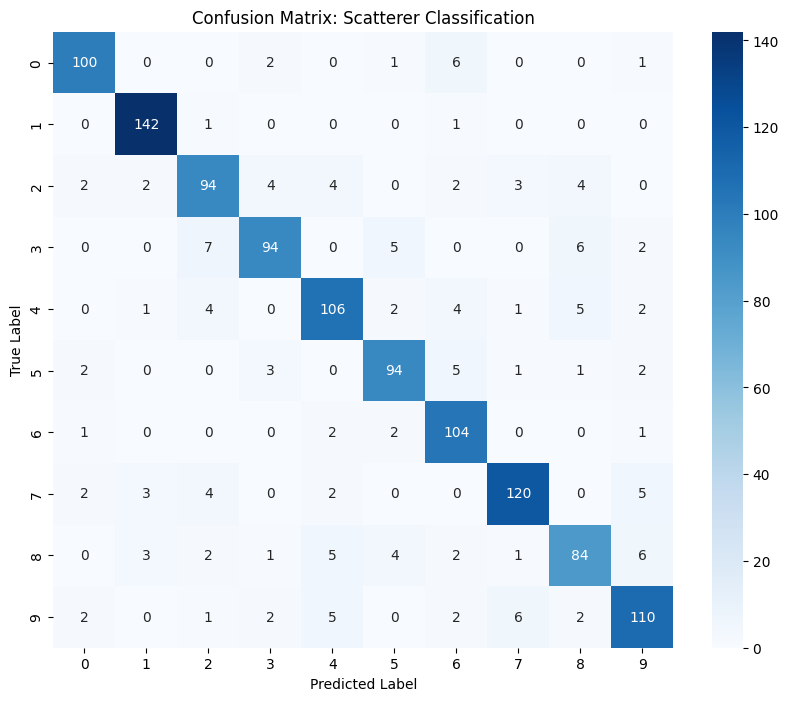

In [ ]:
# 1. Evaluate the model on the test set
test_loss, test_acc = best_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# 2. Generate Predictions
y_pred_probs = best_model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Scatterer Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import time

# To store the results
results = []

for size in range(1000, 11000, 1000):
    print(f"\n--- Training with dataset size: {size} ---")

    # Slice the training data
    X_subset = X_train_cnn[:size]
    y_subset = y_train[:size]

    start_time = time.time()

    # Run the training
    history = best_model.fit(
        X_subset, y_subset,
        epochs=250,
        batch_size=32,
        validation_data=(X_test_cnn, y_test),
        callbacks=[early_stop],
        verbose=0  # Set to 0 to keep the console clean during loops
    )

    end_time = time.time()
    duration = end_time - start_time

    # Get the final validation accuracy from history
    final_acc = history.history['val_accuracy'][-1]

    results.append({
        'Dataset Size': size,
        'Accuracy': final_acc,
        'Time (s)': duration
    })

# --- Final Report ---
print("\n" + "="*30)
print(f"{'Size':<10} | {'Accuracy':<10} | {'Time (s)':<10}")
print("-" * 35)
for res in results:
    print(f"{res['Dataset Size']:<10} | {res['Accuracy']:<10.4f} | {res['Time (s)']:<10.2f}")


--- Training with dataset size: 1000 ---

--- Training with dataset size: 2000 ---

--- Training with dataset size: 3000 ---

--- Training with dataset size: 4000 ---

--- Training with dataset size: 5000 ---

--- Training with dataset size: 6000 ---

--- Training with dataset size: 7000 ---

--- Training with dataset size: 8000 ---

--- Training with dataset size: 9000 ---

--- Training with dataset size: 10000 ---

Size       | Accuracy   | Time (s)  
-----------------------------------
1000       | 0.8500     | 28.36     
2000       | 0.8617     | 45.98     
3000       | 0.8625     | 68.11     
4000       | 0.8617     | 101.89    
5000       | 0.8617     | 116.13    
6000       | 0.8592     | 165.33    
7000       | 0.8692     | 196.81    
8000       | 0.8633     | 212.08    
9000       | 0.8742     | 200.18    
10000      | 0.8717     | 189.28    


Noise performance?

In [ ]:
noise_factor = 0.1
noise_test = noise_factor * np.random.normal(loc=0.0, scale=np.std(X_test_cnn), size=X_test_cnn.shape)
# Add the noise to the original data
X_test_cnn_noisy = X_test_cnn + noise_test
test_loss, test_acc = best_model.evaluate(X_test_cnn_noisy, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 86.42%
